In [1]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

# permet d'afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Data/6.K_means_5f.csv')
df

,customer_unique_id,order_status,review_score,Recency_x,Frequency_x,Monetary,Cluster,Monetary_bis
0,7c396fd4830fd04220f754e42b4e5bff,7,4.0,27.289810,2,1.303348,0,38.71
1,af07308b275d755c9edb36a90c618231,7,4.0,14.162002,1,1.601216,1,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5.0,13.051752,1,1.647432,1,179.12
3,7c142cf63193a1473d2e66489a9ae977,7,5.0,25.737451,1,1.457031,4,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,7,5.0,22.505471,1,1.220373,1,28.62
...,...,...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,5.0,33.093157,1,1.494089,4,85.08
95359,da62f9e57a76d978d02ab5362c509660,7,4.0,22.786720,1,1.663569,1,195.00
95360,737520a9aad80b3fbbdad19b66b37b30,7,5.0,28.407875,1,1.723809,4,271.01
95361,5097a5312c8b157bb7be58ae360ef43c,7,2.0,23.908753,1,1.686544,3,220.58


In [3]:
df['Cluster'].unique()

array([0, 1, 4, 3, 2])

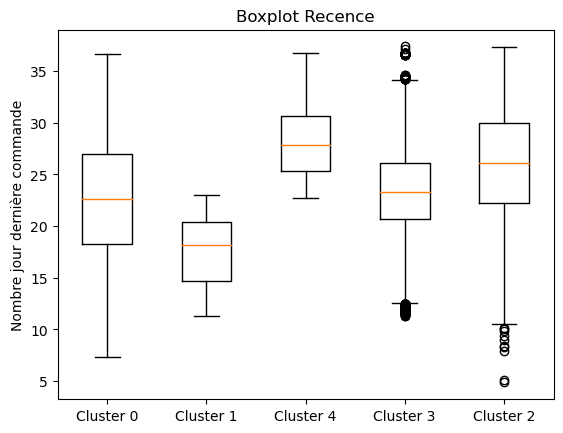

In [4]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Recency_x'])

plt.boxplot(recency)
plt.title("Boxplot Recence")
plt.ylabel("Nombre jour dernière commande")

etiquettes = [f'Cluster {clusters[0]}',
              f'Cluster {clusters[1]}',
              f'Cluster {clusters[2]}',
              f'Cluster {clusters[3]}',
              f'Cluster {clusters[4]}']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

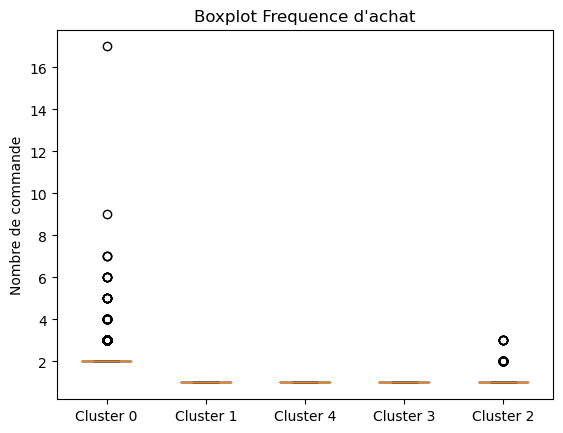

In [5]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Frequency_x'])

plt.boxplot(recency)
plt.title("Boxplot Frequence d'achat")
plt.ylabel("Nombre de commande")

etiquettes = [f'Cluster {clusters[0]}', f'Cluster {clusters[1]}',\
               f'Cluster {clusters[2]}', f'Cluster {clusters[3]}',\
                  f'Cluster {clusters[4]}']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

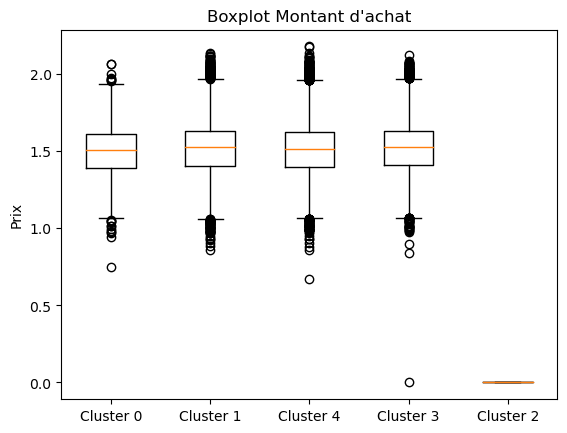

In [6]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = [f'Cluster {clusters[0]}',
              f'Cluster {clusters[1]}',
              f'Cluster {clusters[2]}',
              f'Cluster {clusters[3]}',
              f'Cluster {clusters[4]}']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

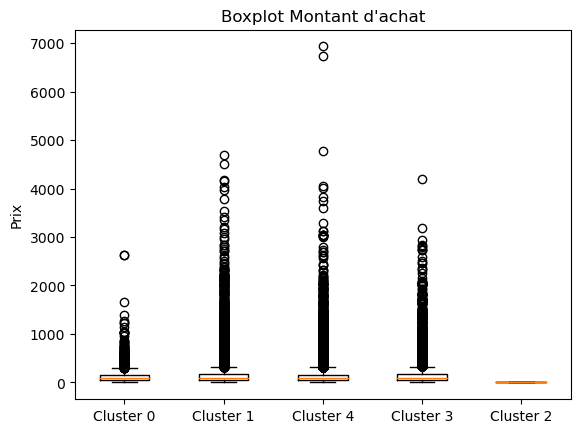

In [7]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary_bis'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = [f'Cluster {clusters[0]}',
              f'Cluster {clusters[1]}',
              f'Cluster {clusters[2]}',
              f'Cluster {clusters[3]}',
              f'Cluster {clusters[4]}']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

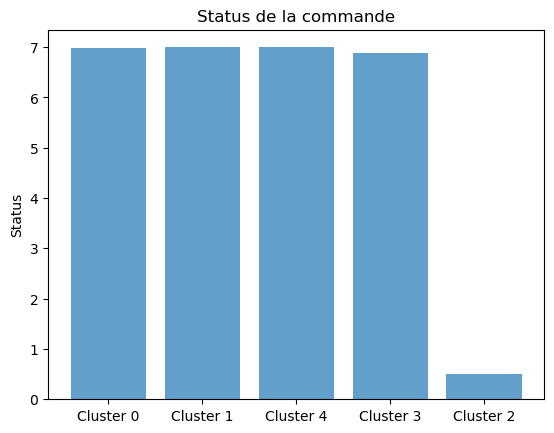

In [8]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency_means = []

for cluster in clusters:
    recency_means.append(df[df['Cluster'] == cluster]['order_status'].mean())

plt.bar(range(len(recency_means)), recency_means, align='center', alpha=0.7)
plt.title("Status de la commande")
plt.ylabel("Status")

etiquettes = [f'Cluster {clusters[0]}',
              f'Cluster {clusters[1]}',
              f'Cluster {clusters[2]}',
              f'Cluster {clusters[3]}',
              f'Cluster {clusters[4]}']

plt.xticks(range(len(etiquettes)), etiquettes)

plt.show()

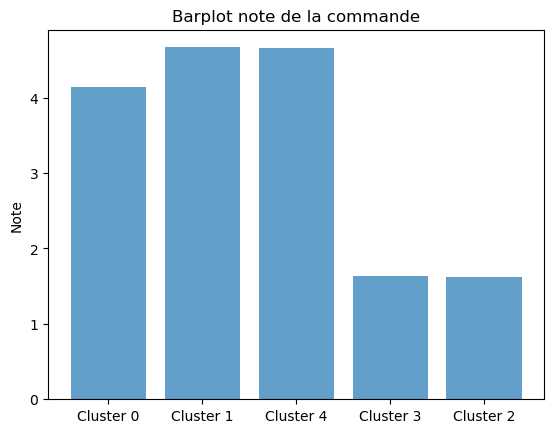

In [9]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency_means = []

for cluster in clusters:
    recency_means.append(df[df['Cluster'] == cluster]['review_score'].mean())

plt.bar(range(len(recency_means)), recency_means, align='center', alpha=0.7)
plt.title("Barplot note de la commande")
plt.ylabel("Note")

etiquettes = [f'Cluster {clusters[0]}',
              f'Cluster {clusters[1]}',
              f'Cluster {clusters[2]}',
              f'Cluster {clusters[3]}',
              f'Cluster {clusters[4]}']

plt.xticks(range(len(etiquettes)), etiquettes)

plt.show()

## Explication du clustering  


Nous pouvons compter 5 clusters qui caractérisent les clients d'[Olist](https://olist.com/pt-br/).


Le premier cluster que nous appelerons C4 est caractérisé par des clients faisant des de nombreux achats d'un montant relativement faible. Ces clients sont relativement satisfait en donnant des notes moyennes à leur produit.  

Le deuxième cluster que nous appelerons C5 est caractérisé par des clients ayant effectués un unique achat il y a longtemps. Ils sont très satisfait de leur achat en donnant une note maximale. Ces clients ont réalisé des achats d'un montant importants sur la plateforme.  

Le troisième cluster que nous appelerons C2 est caractérisé par des clients ayant effectués un unique achat récemment. Ils sont très satisfait de leur achat en donnant une note maximale. Ce sont ces clients qui ont réalisé les achats d'un montant le plus importants sur la plateforme.  

Le quatrième cluster que nous appelerons C1 est caractérisé par des clients ayant effectués un unique achat et sont mécontent de leur achat en donnant de mauvaises notes aux produits achetés.

Le cinquième cluster que nous appeleront C3 est caractérisé par des clients ayant effectués un ou plusieurs achats qui ont été annulé. Ces clients sont mécontent de leurs achats.

In [10]:
# C1
print(len(df[df['Cluster'] == 0]))
# C2
print(len(df[df['Cluster'] == 1]))
# C3
print(len(df[df['Cluster'] == 2]))
# C4
print(len(df[df['Cluster'] == 3]))
# C5
print(len(df[df['Cluster'] == 4]))

2908
35077
1135
16457
39786


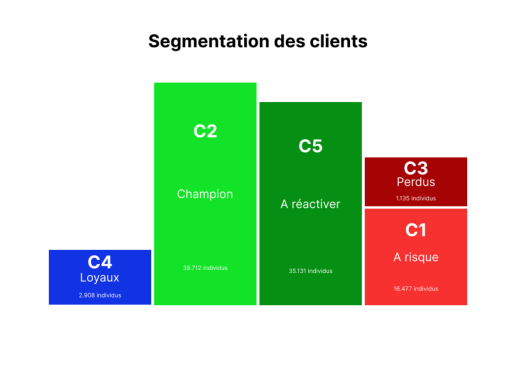

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_image = '../Data/Segmentation.png'
image = mpimg.imread(path_image)
plt.imshow(image)
plt.axis('off')

plt.show()